In [1]:
import torch

from utils         import isnotebook, break_into_images, prepare_folders, live_plot
from utils         import get_annotations, get_nerve_areas, train_val_test_splits
from utils         import dice, batch_dice, hypothesis_test, evaluate
from train_model   import NerveSegDataset, check_models_folder, run_epoch, k_fold_crossval
from model_evals   import evaluate_all_videos, evaluate_external_videos, consolidate_vid_evals, \
                          save_eval_files, plot_p_r_f, get_evaluation_metrics, plot_pr_curve

from configurations import DATA_DIR

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device = ', device) 

device =  cuda


In [3]:
print(isnotebook())

True


In [4]:
images_dir, out_folder, test_vids_dir = prepare_folders(DATA_DIR) 

Output folder :  ./data/output/
Folder for test videos at :  ./data/output/test_videos/
Located 30304 files in images folder at: ./data/us_images
Located 0 files in images folder at: ./data/new_images


In [5]:
all_annotations = get_annotations(DATA_DIR)

# annotation txt files =  163


In [6]:
vid_splits, img_splits, patient_info, all_images = train_val_test_splits(DATA_DIR, images_dir, 'sc') 

Existing folds and train/val/test splits found at : ./data/output/sc_seg_folds.csv


In [7]:
#median_areas = get_nerve_areas(all_annotations, patient_info) 
median_areas = {'sc':3663.0}   

In [8]:
#  9 minutes per epoch on RTX 3090
# 30 minutes per epoch on RTX 2070
models_folder = k_fold_crossval(DATA_DIR, vid_splits, img_splits, patient_info, all_annotations, median_areas)
#models_folder = './data/output/models'

Models folder :  ./data/output/models
All 5 folds completed
Ready for evaluations.


In [10]:
# Around 25 minutes on RTX 3090
eval_folder = evaluate_all_videos(DATA_DIR, out_folder, models_folder, vid_splits, 
                                  all_annotations, median_areas, patient_info) 
#eval_folder = './data/output/video_evals/'   

Video evaluations folder :  ./data/output/video_evals/


Folds: 0it [00:00, ?it/s]

Videos of fold#1:   0%|          | 0/32 [00:00<?, ?it/s]

Images of Video: 2388: 0it [00:00, ?it/s]

Images of Video: 9325: 0it [00:00, ?it/s]

Images of Video: 4555: 0it [00:00, ?it/s]

Images of Video: 4064: 0it [00:00, ?it/s]

Images of Video: 3072: 0it [00:00, ?it/s]

Images of Video: 7692: 0it [00:00, ?it/s]

Images of Video: 3567: 0it [00:00, ?it/s]

Images of Video: 8779: 0it [00:00, ?it/s]

Images of Video: 8979: 0it [00:00, ?it/s]

Images of Video: 2704: 0it [00:00, ?it/s]

Images of Video: 9106: 0it [00:00, ?it/s]

Images of Video: 5649: 0it [00:00, ?it/s]

Images of Video: 9075: 0it [00:00, ?it/s]

Images of Video: 6997: 0it [00:00, ?it/s]

Images of Video: 7564: 0it [00:00, ?it/s]

Images of Video: 9641: 0it [00:00, ?it/s]

Images of Video: 5361: 0it [00:00, ?it/s]

Images of Video: 1032: 0it [00:00, ?it/s]

Images of Video: 2293: 0it [00:00, ?it/s]

Images of Video: 9847: 0it [00:00, ?it/s]

Images of Video: 5030: 0it [00:00, ?it/s]

Images of Video: 2201: 0it [00:00, ?it/s]

Images of Video: 4656: 0it [00:00, ?it/s]

Images of Video: 6039: 0it [00:00, ?it/s]

Images of Video: 6485: 0it [00:00, ?it/s]

Images of Video: 2565: 0it [00:00, ?it/s]

Images of Video: 9344: 0it [00:00, ?it/s]

Images of Video: 8365: 0it [00:00, ?it/s]

Images of Video: 6674: 0it [00:00, ?it/s]

Images of Video: 5850: 0it [00:00, ?it/s]

Images of Video: 4969: 0it [00:00, ?it/s]

Images of Video: 5740: 0it [00:00, ?it/s]

Videos of fold#2:   0%|          | 0/32 [00:00<?, ?it/s]

Images of Video: 6341: 0it [00:00, ?it/s]

Images of Video: 3982: 0it [00:00, ?it/s]

Images of Video: 2654: 0it [00:00, ?it/s]

Images of Video: 4927: 0it [00:00, ?it/s]

Images of Video: 1719: 0it [00:00, ?it/s]

Images of Video: 2621: 0it [00:00, ?it/s]

Images of Video: 1356: 0it [00:00, ?it/s]

Images of Video: 4096: 0it [00:00, ?it/s]

Images of Video: 2443: 0it [00:00, ?it/s]

Images of Video: 1302: 0it [00:00, ?it/s]

Images of Video: 4702: 0it [00:00, ?it/s]

Images of Video: 9897: 0it [00:00, ?it/s]

Images of Video: 9012: 0it [00:00, ?it/s]

Images of Video: 9732: 0it [00:00, ?it/s]

Images of Video: 1643: 0it [00:00, ?it/s]

Images of Video: 4680: 0it [00:00, ?it/s]

Images of Video: 8617: 0it [00:00, ?it/s]

Images of Video: 6282: 0it [00:00, ?it/s]

Images of Video: 8789: 0it [00:00, ?it/s]

Images of Video: 4701: 0it [00:00, ?it/s]

Images of Video: 7026: 0it [00:00, ?it/s]

Images of Video: 8505: 0it [00:00, ?it/s]

Images of Video: 4169: 0it [00:00, ?it/s]

Images of Video: 2416: 0it [00:00, ?it/s]

Images of Video: 3965: 0it [00:00, ?it/s]

Images of Video: 7323: 0it [00:00, ?it/s]

Images of Video: 1490: 0it [00:00, ?it/s]

Images of Video: 7386: 0it [00:00, ?it/s]

Images of Video: 1104: 0it [00:00, ?it/s]

Images of Video: 7693: 0it [00:00, ?it/s]

Images of Video: 4192: 0it [00:00, ?it/s]

Images of Video: 5527: 0it [00:00, ?it/s]

Videos of fold#3:   0%|          | 0/31 [00:00<?, ?it/s]

Images of Video: 4103: 0it [00:00, ?it/s]

Images of Video: 2755: 0it [00:00, ?it/s]

Images of Video: 9092: 0it [00:00, ?it/s]

Images of Video: 2724: 0it [00:00, ?it/s]

Images of Video: 8213: 0it [00:00, ?it/s]

Images of Video: 7704: 0it [00:00, ?it/s]

Images of Video: 8241: 0it [00:00, ?it/s]

Images of Video: 1811: 0it [00:00, ?it/s]

Images of Video: 1592: 0it [00:00, ?it/s]

Images of Video: 1934: 0it [00:00, ?it/s]

Images of Video: 4344: 0it [00:00, ?it/s]

Images of Video: 5058: 0it [00:00, ?it/s]

Images of Video: 6701: 0it [00:00, ?it/s]

Images of Video: 4971: 0it [00:00, ?it/s]

Images of Video: 3110: 0it [00:00, ?it/s]

Images of Video: 1081: 0it [00:00, ?it/s]

Images of Video: 7048: 0it [00:00, ?it/s]

Images of Video: 1433: 0it [00:00, ?it/s]

Images of Video: 4981: 0it [00:00, ?it/s]

Images of Video: 6104: 0it [00:00, ?it/s]

Images of Video: 9101: 0it [00:00, ?it/s]

Images of Video: 9814: 0it [00:00, ?it/s]

Images of Video: 6637: 0it [00:00, ?it/s]

Images of Video: 2329: 0it [00:00, ?it/s]

Images of Video: 9299: 0it [00:00, ?it/s]

Images of Video: 9452: 0it [00:00, ?it/s]

Images of Video: 8902: 0it [00:00, ?it/s]

Images of Video: 2848: 0it [00:00, ?it/s]

Images of Video: 8988: 0it [00:00, ?it/s]

Images of Video: 5946: 0it [00:00, ?it/s]

Images of Video: 5088: 0it [00:00, ?it/s]

Videos of fold#4:   0%|          | 0/35 [00:00<?, ?it/s]

Images of Video: 7001: 0it [00:00, ?it/s]

Images of Video: 6422: 0it [00:00, ?it/s]

Images of Video: 5749: 0it [00:00, ?it/s]

Images of Video: 6968: 0it [00:00, ?it/s]

Images of Video: 1595: 0it [00:00, ?it/s]

Images of Video: 4764: 0it [00:00, ?it/s]

Images of Video: 4374: 0it [00:00, ?it/s]

Images of Video: 4215: 0it [00:00, ?it/s]

Images of Video: 8917: 0it [00:00, ?it/s]

Images of Video: 6142: 0it [00:00, ?it/s]

Images of Video: 5452: 0it [00:00, ?it/s]

Images of Video: 7726: 0it [00:00, ?it/s]

Images of Video: 4277: 0it [00:00, ?it/s]

Images of Video: 9004: 0it [00:00, ?it/s]

Images of Video: 6168: 0it [00:00, ?it/s]

Images of Video: 7202: 0it [00:00, ?it/s]

Images of Video: 8117: 0it [00:00, ?it/s]

Images of Video: 3241: 0it [00:00, ?it/s]

Images of Video: 8674: 0it [00:00, ?it/s]

Images of Video: 8515: 0it [00:00, ?it/s]

Images of Video: 8386: 0it [00:00, ?it/s]

Images of Video: 2082: 0it [00:00, ?it/s]

Images of Video: 2940: 0it [00:00, ?it/s]

Images of Video: 2237: 0it [00:00, ?it/s]

Images of Video: 9875: 0it [00:00, ?it/s]

Images of Video: 4891: 0it [00:00, ?it/s]

Images of Video: 8397: 0it [00:00, ?it/s]

Images of Video: 6208: 0it [00:00, ?it/s]

Images of Video: 6908: 0it [00:00, ?it/s]

Images of Video: 5247: 0it [00:00, ?it/s]

Images of Video: 1199: 0it [00:00, ?it/s]

Images of Video: 2622: 0it [00:00, ?it/s]

Images of Video: 2706: 0it [00:00, ?it/s]

Images of Video: 3938: 0it [00:00, ?it/s]

Images of Video: 9415: 0it [00:00, ?it/s]

Videos of fold#5:   0%|          | 0/27 [00:00<?, ?it/s]

Images of Video: 4296: 0it [00:00, ?it/s]

Images of Video: 2595: 0it [00:00, ?it/s]

Images of Video: 9798: 0it [00:00, ?it/s]

Images of Video: 3161: 0it [00:00, ?it/s]

Images of Video: 7837: 0it [00:00, ?it/s]

Images of Video: 2596: 0it [00:00, ?it/s]

Images of Video: 9005: 0it [00:00, ?it/s]

Images of Video: 4605: 0it [00:00, ?it/s]

Images of Video: 4628: 0it [00:00, ?it/s]

Images of Video: 8018: 0it [00:00, ?it/s]

Images of Video: 9270: 0it [00:00, ?it/s]

Images of Video: 2904: 0it [00:00, ?it/s]

Images of Video: 8510: 0it [00:00, ?it/s]

Images of Video: 2753: 0it [00:00, ?it/s]

Images of Video: 6542: 0it [00:00, ?it/s]

Images of Video: 8896: 0it [00:00, ?it/s]

Images of Video: 8402: 0it [00:00, ?it/s]

Images of Video: 8884: 0it [00:00, ?it/s]

Images of Video: 1861: 0it [00:00, ?it/s]

Images of Video: 2002: 0it [00:00, ?it/s]

Images of Video: 3673: 0it [00:00, ?it/s]

Images of Video: 6185: 0it [00:00, ?it/s]

Images of Video: 6802: 0it [00:00, ?it/s]

Images of Video: 2014: 0it [00:00, ?it/s]

Images of Video: 1245: 0it [00:00, ?it/s]

Images of Video: 8224: 0it [00:00, ?it/s]

Images of Video: 3015: 0it [00:00, ?it/s]

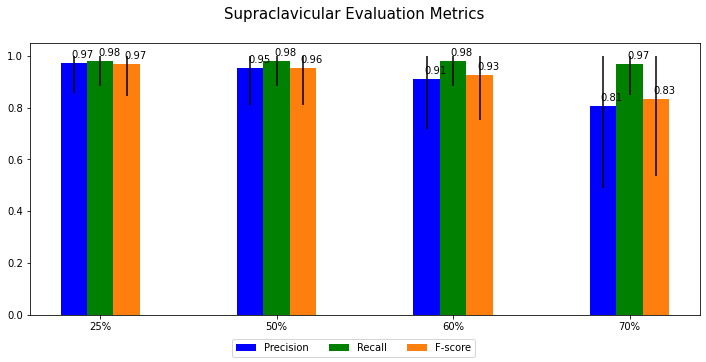

In [11]:
df_mean, df_min, df_max, df_std = consolidate_vid_evals(eval_folder)
save_eval_files(out_folder, df_mean, df_min, df_max, df_std)
f,p,r,s = get_evaluation_metrics(df_mean, df_min, df_max, df_std, nerve='sc')
plot_p_r_f(p,r,f,'Supraclavicular Evaluation Metrics')

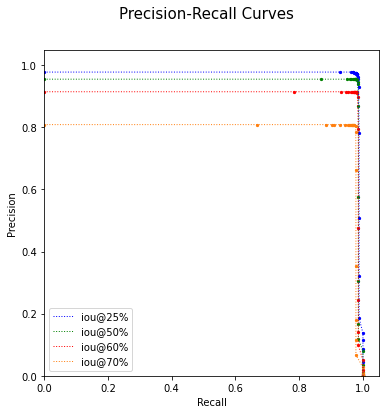

In [12]:
plot_pr_curve('sc', 'Precision-Recall Curves', df_mean, f)